---
## Decision Trees<br> <font size=3.4> Dataset:iris.csv<br><font size=2>Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling the form
---

In [1]:
#Importing the libararies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
#Importing the training dataset
df = pd.read_csv('/Users/Ketan/Data Science Assignments/Decision Trees/iris.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#Checking the datatypes
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
#Checking for NA values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#Missing value imputation for categorical vlaue
df=df.fillna(df.mode().iloc[0])

In [7]:
#Rechecking the NA values
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
#Dropping the unnecessary columns
df1 = df.drop(['Loan_ID'],axis=1)
df1 = df1.iloc[:,0:11]
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [9]:
#Creating dummies for categorical variables

df2= pd.get_dummies(df1)
df2

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,120.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [10]:
#Checking the datatypes again
df2.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [11]:
#Changing the datatypes
df2['CoapplicantIncome']= df2['CoapplicantIncome'].astype('int64')
df2['LoanAmount']= df2['LoanAmount'].astype('int64')
df2['Loan_Amount_Term'] = df2['Loan_Amount_Term'].astype('int64')
df2['Credit_History'] = df2['Credit_History'].astype('int64')
df2.dtypes

ApplicantIncome            int64
CoapplicantIncome          int64
LoanAmount                 int64
Loan_Amount_Term           int64
Credit_History             int64
Gender_Female              uint8
Gender_Male                uint8
Married_No                 uint8
Married_Yes                uint8
Dependents_0               uint8
Dependents_1               uint8
Dependents_2               uint8
Dependents_3+              uint8
Education_Graduate         uint8
Education_Not Graduate     uint8
Self_Employed_No           uint8
Self_Employed_Yes          uint8
Property_Area_Rural        uint8
Property_Area_Semiurban    uint8
Property_Area_Urban        uint8
dtype: object

In [12]:
x= df2
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0,120,360,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508,128,360,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0,66,360,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358,120,360,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0,141,360,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0,71,360,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0,40,180,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240,253,360,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0,187,360,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [13]:
#Converting the target variable into categorical one
df['Loan_Status'] = df['Loan_Status'].astype('category')

In [14]:
y = df['Loan_Status']
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: category
Categories (2, object): ['N', 'Y']

In [15]:
#Uploading the test data
test= pd.read_csv('/Users/lalitmehendiratta/Downloads/test_lAUu6dG.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [16]:
#Imputing the missing values
test=test.fillna(test.mode().iloc[0])

In [17]:
#Dropping the unnecessary columns
test1= test.drop(['Loan_ID'],axis=1)
test2= test1.iloc[:,0:13]

test2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [18]:
#Creating dummy variables for the categorical columns
df_test = pd.get_dummies(test2)
df_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [19]:
#Changing the datatypes
df_test['CoapplicantIncome']= df_test['CoapplicantIncome'].astype('int64')
df_test['LoanAmount']= df_test['LoanAmount'].astype('int64')
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].astype('int64')
df_test['Credit_History'] = df_test['Credit_History'].astype('int64')
df_test.dtypes

ApplicantIncome            int64
CoapplicantIncome          int64
LoanAmount                 int64
Loan_Amount_Term           int64
Credit_History             int64
Gender_Female              uint8
Gender_Male                uint8
Married_No                 uint8
Married_Yes                uint8
Dependents_0               uint8
Dependents_1               uint8
Dependents_2               uint8
Dependents_3+              uint8
Education_Graduate         uint8
Education_Not Graduate     uint8
Self_Employed_No           uint8
Self_Employed_Yes          uint8
Property_Area_Rural        uint8
Property_Area_Semiurban    uint8
Property_Area_Urban        uint8
dtype: object

### Building Decision Tree Classifier using Entropy Criteria

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x,y)
preds = model.predict(df_test) # predicting on test data set 

In [21]:
preds

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [22]:
print('Model leaves:',model.get_n_leaves(),'\n','\n',
      pd.Series(preds).value_counts(),'\n','\n')

Model leaves: 13 
 
 Y    313
N     54
dtype: int64 
 



In [23]:
PREDS= pd.Series(preds)
df_final = pd.concat([PREDS, test],axis=1) 
df_final.iloc[:,0:2] #Final output

,0,Loan_ID
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,Y,LP001035
4,Y,LP001051
...,...,...
362,Y,LP002971
363,Y,LP002975
364,Y,LP002980
365,Y,LP002986


In [24]:
df_final.to_csv('file1.csv') 

Text(0.5, 1.0, 'Decision Tree using Entropy')

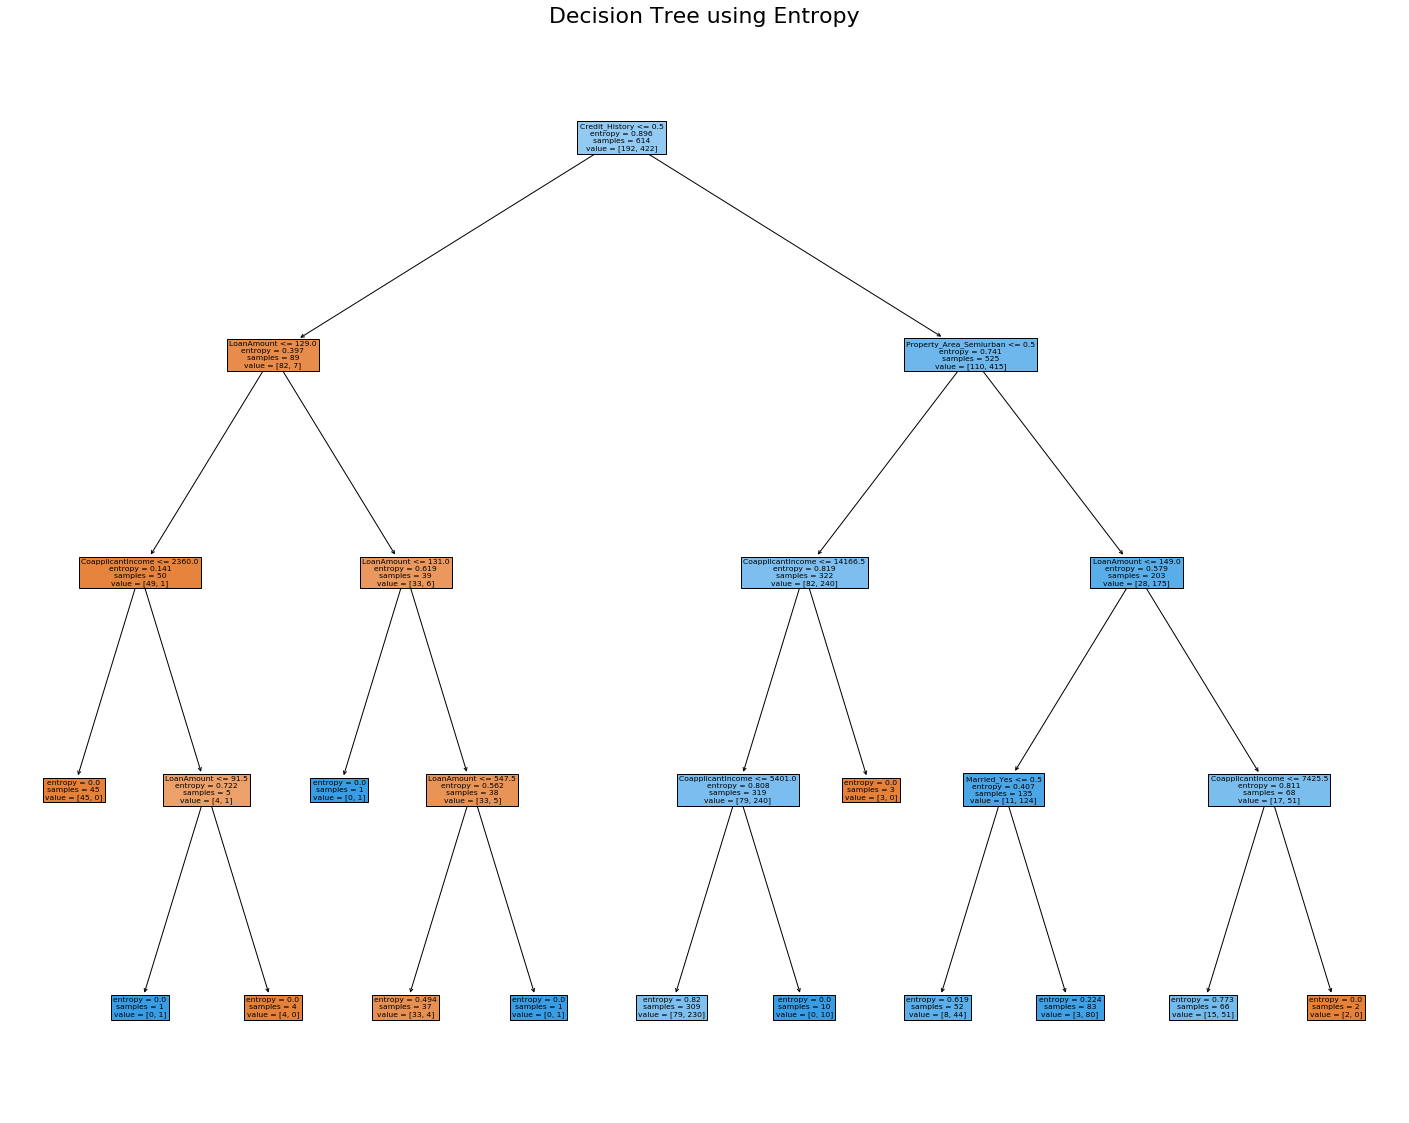

In [25]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names= ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
                                     'Credit_History','Gender_Female','Gender_Male','Married_No','Married_Yes',
                                     'Dependents_0','Dependents_1','Dependents_2','Dependents_3+',
                                     'Education_Graduate','Education_Not Graduate','Self_Employed_No',
                                     'Self_Employed_Yes','Property_Area_Rural','Property_Area_Semiurban',
                                     'Property_Area_Urban','Loan Status'], filled=True)
plt.title('Decision Tree using Entropy',fontsize=22)
